In [2]:
import pandas as pd
import numpy as np

In [3]:
data_deleted = pd.read_csv('Last_version_deleted.csv',low_memory=False)
legitmate_data = pd.read_csv('Last_version_legitmate.csv',low_memory=False)

In [154]:
full.sum()
full.head()

C:\Users\Maryam\AppData\Local\Temp/ipykernel_11000/2989218543.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  full.sum()


,Author,Content,Tweet_id,Following,Followers,Deleted,Clean,Postags,LS,TO,...,MD,VB,WRB,NNP,EX,NNS,SYM,CC,CD,POS
0,Sean Spicer,RNC Chair @rnc @ReincePriebus will be on CSPAN...,1.680000e+17,995,448K,1,rnc chair will be on cspan around pm tonight f...,"['NN', 'NN', 'VBP', 'IN', 'NN', 'NN', 'NN']",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,Sean Spicer,Want to know the real cost of Obamacare http:/...,1.250000e+17,995,448K,1,want to know the real cost of obamacare,"['NN', 'VB', 'JJ', 'NN', 'NN']",0.0,0.0,...,0.0,0.2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,Sean Spicer,.@rollcall @pennstatetom makes the case for ph...,6.750000e+17,995,448K,1,makes the case for photographers media walk thru,"['VBZ', 'NN', 'NNS', 'NNS', 'VBP', 'NN']",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0
3,Ben & Candy Carson,Building strong relationships will #HealInspir...,6.520000e+17,50,2.2M,1,building strong relationships will healinspire...,"['NN', 'JJ', 'NNS', 'JJ', 'NN']",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,0.0
4,Larry Kudlow,@noellenikpour @StephenMoore @batchelorshow @M...,5.170000e+17,322,235.9,1,hi noelle please give me a yell,"['NN', 'JJ', 'NN', 'VB', 'NN']",0.0,0.0,...,0.0,0.2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [299]:
df_deleted_pos = data_deleted.iloc[:,:53]

In [300]:
legitmate_data_pos = legitmate_data.iloc[:,:53]

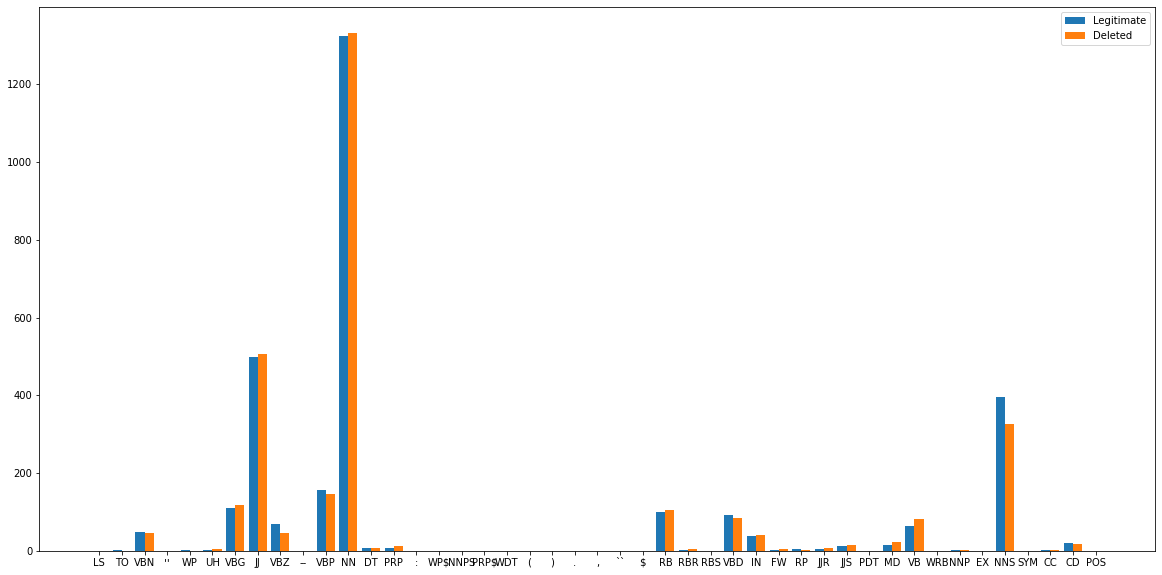

In [301]:
# Create a Plot for POS tags

fig = plt.figure(figsize =(20, 10))

x=legitmate_data_pos.columns[8:]
df_l =legitmate_data_pos.sum(axis=0)[8:]
Legitimate=list(df_l)

df_D =df_deleted_pos.sum(axis=0)[8:]
Deleted=list(df_D)


#female = [5, 10, 15, 20, 25]
#male = [15, 20, 30, 16, 13]

x_axis = np.arange(len(x))

# Multi bar Chart

plt.bar(x_axis -0.2, Legitimate, width=0.4, label = 'Legitimate')
plt.bar(x_axis +0.2, Deleted, width=0.4, label = 'Deleted')

# Xticks

plt.xticks(x_axis, x)

# Add legend

plt.legend()

# Display

plt.show()

In [302]:
full = pd.concat([df_deleted_pos, legitmate_data_pos]).reset_index(drop=True)
full.shape

(5916, 53)

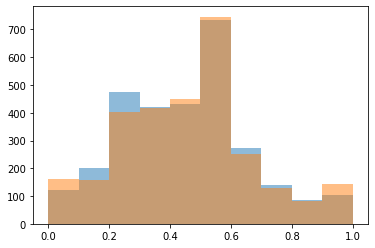

In [275]:
plt.hist(legitmate_data['NN'],bins = 10, alpha = 0.5)
plt.hist(data_deleted['NN'],bins = 10, alpha = 0.5)
plt.show()

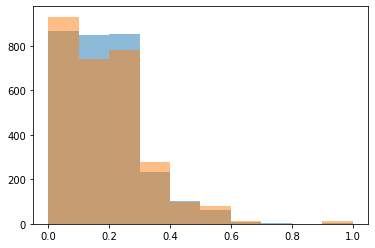

In [276]:
plt.hist(legitmate_data['JJ'],bins = 10, alpha = 0.5)
plt.hist(data_deleted['JJ'],bins = 10, alpha = 0.5)
plt.show()

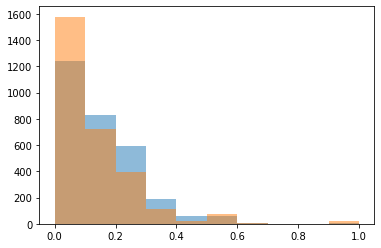

In [277]:
plt.hist(legitmate_data['NNS'],bins = 10, alpha = 0.5)
plt.hist(data_deleted['NNS'],bins = 10, alpha = 0.5)
plt.show()

In [282]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix

x = full.iloc[:, 8:]
y = full.iloc[:, 5]

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(x, y)

for train_index, test_index in skf.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x.loc[train_index], x.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    clf = GradientBoostingClassifier(learning_rate=0.1, max_depth= 5, max_features = 5,random_state = 42)
#     clf = RandomForestClassifier(random_state = 42)
    
    clf.fit(x_train, y_train)
    preds = clf.predict(x_test)
    
    print('accuracy_score',accuracy_score(y_test, preds))
    
    print('confusion_matrix',confusion_matrix(y_test, preds))


total_preds = clf.predict(x)
print("Confusion Matrix:")
confusion_matrix(y,total_preds)

TRAIN: [ 588  589  590 ... 5913 5914 5915] TEST: [   0    1    2 ... 3529 3530 3531]
accuracy_score 0.6157094594594594
confusion_matrix [[374 222]
 [233 355]]
TRAIN: [   0    1    2 ... 5913 5914 5915] TEST: [ 588  589  590 ... 4125 4126 4127]
accuracy_score 0.5756551141166526
confusion_matrix [[344 252]
 [250 337]]
TRAIN: [   0    1    2 ... 5913 5914 5915] TEST: [1175 1176 1177 ... 4721 4722 4723]
accuracy_score 0.5832628909551987
confusion_matrix [[360 236]
 [257 330]]
TRAIN: [   0    1    2 ... 5913 5914 5915] TEST: [1762 1763 1764 ... 5317 5318 5319]
accuracy_score 0.5908706677937448
confusion_matrix [[344 252]
 [232 355]]
TRAIN: [   0    1    2 ... 5317 5318 5319] TEST: [2349 2350 2351 ... 5913 5914 5915]
accuracy_score 0.5731191885038038
confusion_matrix [[331 265]
 [240 347]]
Confusion Matrix:


array([[1944, 1036],
       [ 999, 1937]], dtype=int64)

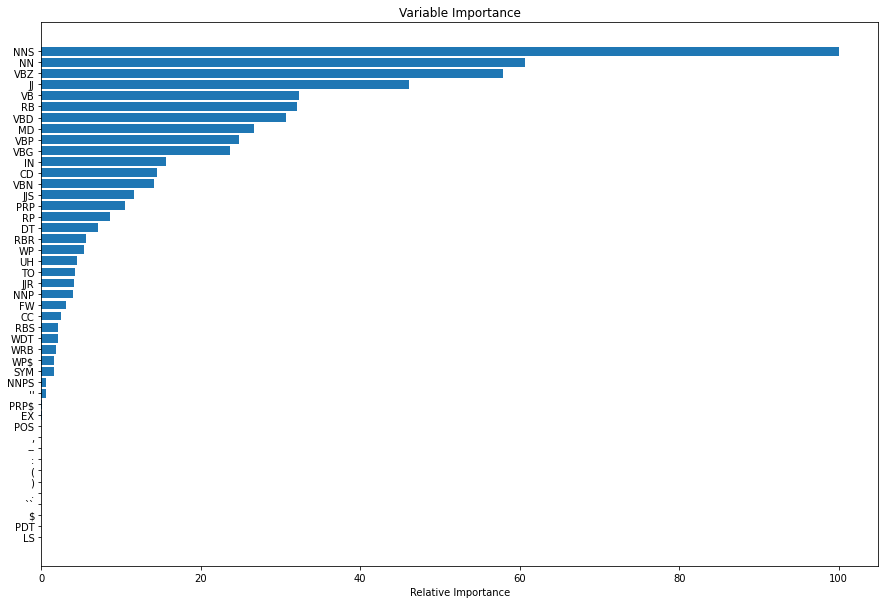

In [284]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(15,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [285]:
x = full.iloc[:, 8:]
y = full.iloc[:, 5]

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(x, y)

for train_index, test_index in skf.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x.loc[train_index], x.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    #clf = GradientBoostingClassifier(learning_rate=0.1, max_depth= 5, max_features = 5,random_state = 42)
    clf = RandomForestClassifier(random_state = 42)
    
    clf.fit(x_train, y_train)
    preds = clf.predict(x_test)
    
    print('accuracy_score',accuracy_score(y_test, preds))
    
    print('confusion_matrix',confusion_matrix(y_test, preds))


total_preds = clf.predict(x)
print("Confusion Matrix:")
confusion_matrix(y,total_preds)

TRAIN: [ 588  589  590 ... 5913 5914 5915] TEST: [   0    1    2 ... 3529 3530 3531]
accuracy_score 0.5793918918918919
confusion_matrix [[323 273]
 [225 363]]
TRAIN: [   0    1    2 ... 5913 5914 5915] TEST: [ 588  589  590 ... 4125 4126 4127]
accuracy_score 0.5486052409129332
confusion_matrix [[334 262]
 [272 315]]
TRAIN: [   0    1    2 ... 5913 5914 5915] TEST: [1175 1176 1177 ... 4721 4722 4723]
accuracy_score 0.5511411665257819
confusion_matrix [[326 270]
 [261 326]]
TRAIN: [   0    1    2 ... 5913 5914 5915] TEST: [1762 1763 1764 ... 5317 5318 5319]
accuracy_score 0.5739644970414202
confusion_matrix [[324 272]
 [232 355]]
TRAIN: [   0    1    2 ... 5317 5318 5319] TEST: [2349 2350 2351 ... 5913 5914 5915]
accuracy_score 0.5722738799661876
confusion_matrix [[327 269]
 [237 350]]
Confusion Matrix:


array([[2409,  571],
       [ 481, 2455]], dtype=int64)

In [294]:
# Implement SVM on POS tags


#Splitting the dataset into training and test samples

from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(full, test_size = 0.2, random_state = 1)

#Classifying the predictors and target

X_train = training_set.iloc[:,8:].values
Y_train = training_set.iloc[:,5].values
X_test = test_set.iloc[:,8:].values
Y_test = test_set.iloc[:,5].values


#Initializing Support Vector Machine and fitting the training data

from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,Y_train)

#Predicting the classes for test set

Y_pred = classifier.predict(X_test)

#Calculating the accuracy of the predictions using the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.5633445945945946


In [298]:
#Implement Decision Tree
# Split dataset into training set and test set
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

x = full.iloc[:, 8:]
y = full.iloc[:, 5]


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy Of Decision Tree Without  Optimization For The Given Dataset :",metrics.accuracy_score(y_test, y_pred))

Accuracy Of Decision Tree Without  Optimization For The Given Dataset : 0.5430985915492957


In [291]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy Of Decision Tree After Optimization For The Given Dataset  :",metrics.accuracy_score(y_test, y_pred))

Accuracy Of Decision Tree After Optimization For The Given Dataset  : 0.5836619718309859


In [262]:
data_deleted.shape

(2936, 7202)

In [269]:
legitmate_data_Ph = legitmate_data[['Deleted','VP','NP']]
data_deleted_Ph = data_deleted[['Deleted','VP','NP']]
full_Ph = pd.concat([data_deleted_Ph, legitmate_data_Ph]).reset_index(drop=True)
full_Ph.shape

(5916, 3)

In [272]:
full_Ph.head()

,Deleted,VP,NP
0,1,0.20,0.80
1,1,0.25,0.75
2,1,0.25,0.75
3,1,0.00,1.00
4,1,0.00,1.00


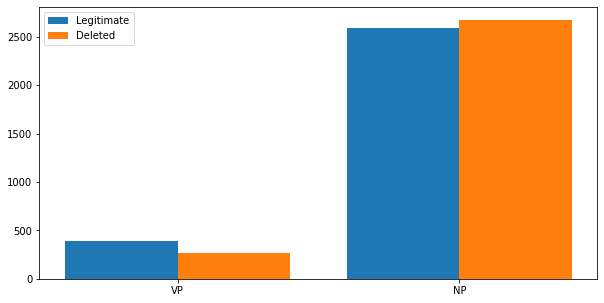

In [274]:
# BarPlot for phrasal tags
fig = plt.figure(figsize =(10, 5))

x=legitmate_data_Ph.columns[1:]
df_l =legitmate_data_Ph.sum(axis=0)[1:]
Legitimate=list(df_l)

df_D =data_deleted_Ph.sum(axis=0)[1:]
Deleted=list(df_D)

x_axis = np.arange(len(x))

# Multi bar Chart

plt.bar(x_axis -0.2, Legitimate, width=0.4, label = 'Legitimate')
plt.bar(x_axis +0.2, Deleted, width=0.4, label = 'Deleted')

# Xticks

plt.xticks(x_axis, x)

# Add legend

plt.legend()

# Display

plt.show()